In [3]:
import numpy as np
import pandas as pd

# Import Data

In [4]:
df = pd.read_csv('../../Wira - Github/18 - Unsupervised Learning/01 - Clustering/data/customer.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


dataset : https://archive.ics.uci.edu/ml/datasets/wholesale+customers

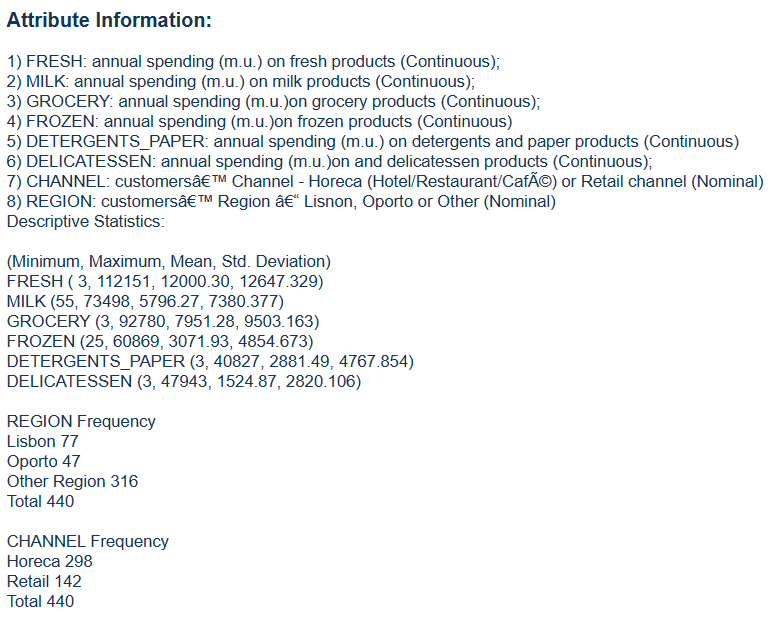

# Menentukan Jumlah Cluster

kalau ada data bertipe kategorik, jangan pakai K-Means, khusus numerikal <br>
<b>K-modes & K-means = K-prototype</b>

## <b>K-Prototypes

In [9]:
from kmodes.kprototypes import KPrototypes
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

100%|██████████| 8/8 [01:01<00:00,  7.65s/it]


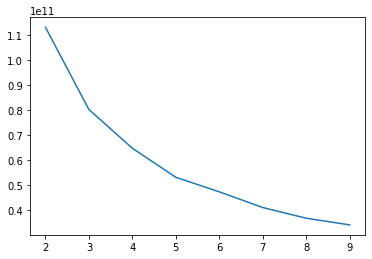

In [12]:
score = []

for k in tqdm(range(2, 10)):
    model = KPrototypes(n_clusters=k)
    model.fit(df, categorical=[0, 1]) #categorical kolom ke 0 dan ke 1

    score.append(model.cost_)
plt.plot(range(2, 10), score)

<b>Jumlah K = 3

# Training

In [18]:
model = KPrototypes(n_clusters=3)
member = model.fit_predict(df, categorical=[0, 1]) #categorical kolom ke 0 dan ke 1

In [19]:
df_pred = df.copy()
df_pred['cluster'] = member
df_pred.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,2


# Analisis Cluster

In [60]:
center = model.cluster_centroids_
center

array([[8.02741176e+03, 1.83759216e+04, 2.73425490e+04, 2.01431373e+03,
        1.23146078e+04, 2.23325490e+03, 2.00000000e+00, 3.00000000e+00],
       [8.24999696e+03, 3.80096657e+03, 5.24855623e+03, 2.57167781e+03,
        1.75511246e+03, 1.13701824e+03, 1.00000000e+00, 3.00000000e+00],
       [3.59414000e+04, 6.04445000e+03, 6.28861667e+03, 6.71396667e+03,
        1.03966667e+03, 3.04946667e+03, 1.00000000e+00, 3.00000000e+00]])

In [63]:
kolom = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen', 'Channel', 'Region']
df_center = pd.DataFrame(center, columns=kolom)
df_center

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel,Region
0,8027.411765,18375.921569,27342.549020,2014.313725,12314.607843,2233.254902,2.0,3.0
1,8249.996960,3800.966565,5248.556231,2571.677812,1755.112462,1137.018237,1.0,3.0
2,35941.400000,6044.450000,6288.616667,6713.966667,1039.666667,3049.466667,1.0,3.0


In [64]:
df.mean()

Channel                 1.322727
Region                  2.543182
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
dtype: float64

- Cluster 0: orang yang memiliki banyak kebutuhan kecuali Fresh dan Frozen
    - Kolom Fresh <b> < </b> 12000.297727 &emsp; ==> 8027.411765
    - Kolom Milk <b> > </b> 5796.265909 &emsp; ==> 18375.921569
    - Kolom Grocery <b> > </b> 7951.277273 &emsp; ==> 27342.549020
    - Kolom Frozen <b> < </b> 3071.931818 &emsp; ==> 2014.313725	
    - Kolom Detergents_Paper <b> > </b> 2881.493182 &emsp; ==> 12314.607843
    - Kolom Delicassen <b> > </b> 1524.870455 &emsp; ==> 2233.254902<br><br>

- Cluster 1: orang hemat (belanja secukupnya)
    - Kolom Fresh <b><</b> </b> 12000.297727 &emsp; ==> 8249.996960 
    - Kolom Milk <b> < </b> 5796.265909 &emsp; ==> 3800.966565
    - Kolom Grocery <b> < </b> 7951.277273 &emsp; ==> 5248.556231
    - Kolom Frozen <b> == </b> 3071.931818 &emsp; ==> 2571.677812	
    - Kolom Detergents_Paper <b> < </b> 2881.493182 &emsp; ==> 1755.112462
    - Kolom Delicassen <b> == </b> 1524.870455 &emsp; ==> 1137.018237<br><br>	 

- Cluster 2: orang yang kebutuhan yang cukup kecuali Grocery dan Detergents_Paper
    - Kolom Fresh <b> > </b> 12000.297727 &emsp; ==> 35941.400000
    - Kolom Milk <b> == </b> 5796.265909 &emsp; ==> 6044.450000
    - Kolom Grocery <b> == </b> 7951.277273 &emsp; ==> 6288.616667
    - Kolom Frozen <b> > </b> 3071.931818 &emsp; ==> 6713.966667	
    - Kolom Detergents_Paper <b> < </b> 2881.493182 &emsp; ==> 1039.666667
    - Kolom Delicassen <b> > </b> 1524.870455 &emsp; ==> 3049.466667

# Popular Conventional Approach
Melakukan Customer Segmentation dengan tier sederhana memanfaatkan <b>RFM (Recency - Frequency - Monetary)</b><br>
- Recency = Seberapa Recent Transaksinya
- Frequency = Seberapa Sering Transaksinya
- Moneyary = Seberapa Besar Transaksinya
<br><br>Membuat kolom baru Memanfaatkan RFM